# **Installation steps** 

In [ ]:
!pip install pandas
!pip install seaborn
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importing required libraries and setting column and rows**

In [ ]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

<Figure size 720x576 with 0 Axes>

# **Classification of reproducibility based on score value.**

([<matplotlib.patches.Wedge at 0x7f262858c850>,
 [Text(0.9315689244597208, 0.5849609721861443, 'Probably Reproducible'),
  Text(0.3691106580863123, 1.0362226218757673, 'Mostly reproducible'),
  Text(-0.8636380499146294, -0.6812703712474631, 'irreproducible')],
 [Text(0.5081285042507567, 0.3190696211924423, '18%'),
  Text(0.20133308622889762, 0.5652123392049639, '3%'),
  Text(-0.47107529995343417, -0.3716020206804344, '79%')])

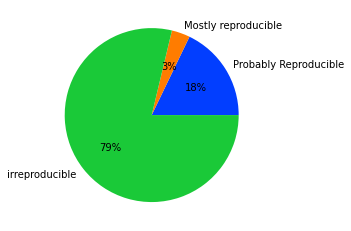

In [ ]:
# Idea: Take the score and compute the final value.
probably_reproducible=0
irreproducible=0
mostly_reproducible=0

df=pd.read_csv('../Data/final_out.csv')  
df_one = df[['Id','CreationDate','AcceptedAnswerId','Score','Body','AnswerCount','Status']]

total_count = len(df_one)
score_val = df_one['Score']
answer_count = df_one['AnswerCount']
# Filter the data with probably_reproducible and irreproducible into a dataframe

for score in score_val:
  if(score > 0 and score <=1):
    probably_reproducible += 1
    
  if(score > 2):
    mostly_reproducible += 1

  if(score<=0):
    irreproducible += 1


probably_rep_percentage = (probably_reproducible/total_count)*100

mostly_rep_percentage = (mostly_reproducible/total_count)*100

irrep_percentage = (irreproducible/total_count)*100

rep_irep_dict = {'Probably Reproducible':[probably_rep_percentage] , 'Mostly reproducible': [mostly_rep_percentage], 'irreproducible': [irrep_percentage]}

keys = list(rep_irep_dict.keys())

vals = [probably_rep_percentage, mostly_rep_percentage, irrep_percentage]

#sns.barplot(x=keys, y=vals, hue=keys, dodge = False)


colors = sns.color_palette('bright')[0:5]
#plt.pie(vals, keys)
plt.pie(vals, labels = keys, colors = colors, autopct='%.0f%%')




# **Classification of reproducibility based on answer count**

([<matplotlib.patches.Wedge at 0x7f2625797450>,
 [Text(0.21665563822501793, 1.0784527502052699, 'Reproducible'),
  Text(-0.21665573919705047, -1.0784527299205005, 'irreproducible')],
 [Text(0.11817580266819158, 0.5882469546574199, '44%'),
  Text(-0.1181758577438457, -0.5882469435930002, '56%')])

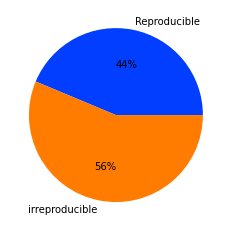

In [ ]:
# if answer_count > 1 then probably reproducible and irreproducible are most likely to be reproducible.
# if data not available, then tweak the answer_count.
# if answer_count < 1 then irreproducible.


answer_count_rep = []
answer_count_irrep = []
total_count_list = []
answer_count_probable = []

for count in answer_count:
  if(count<=1):
    answer_count_irrep.append(count)
  if(count>1):
    answer_count_rep.append(count)
 


irreproducibility_percentage = (len(answer_count_irrep)/len(answer_count))*100
reproducibile_percentage = (len(answer_count_rep)/len(answer_count))*100


#irreproducibility_percentage

rep_irep_dict = {'Reproducible':[reproducibile_percentage] , 'irreproducible': [irreproducibility_percentage]}


keys = list(rep_irep_dict.keys())

vals = [reproducibile_percentage, irreproducibility_percentage]



colors = sns.color_palette('bright')[0:5]
#plt.pie(vals, keys)
plt.pie(vals, labels = keys, colors = colors, autopct='%.0f%%')



# **Classification of reproducibility based on Answer count and score taken into consideration.**

([<matplotlib.patches.Wedge at 0x7f2625898f90>,
 [Text(1.0750233810180685, 0.2330766617756501, 'Reproducible'),
  Text(-0.5305169580591491, 0.9636139046379868, 'irreproducible'),
  Text(0.3142929535890671, -1.0541441738795791, 'Probably Reproducible')],
 [Text(0.5863763896462192, 0.12713272460490002, '7%'),
  Text(-0.2893728862140813, 0.5256075843479927, '52%'),
  Text(0.17143252013949112, -0.5749877312070432, '41%')])

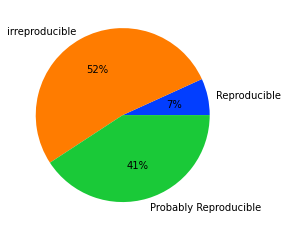

In [ ]:
# Generalizability ==> approximately true
# score and count > 1 reproducible
# score and count == 1 irreproducible
# score and count 
import itertools

rep = []
irrep = []
probably_rep = []

for count, score in zip(answer_count,score_val):
    if(score>1 and count>1):
      rep.append((score,count)) # reproducible
    elif(score<=1 and count<=1): 
      irrep.append((score,count)) # irreproducibility
    else:
      probably_rep.append((score,count)) # Probably reproducible

total_len = len(probably_rep)+len(rep)+len(irrep)

rep_percentage = (len(rep)/total_len)*100
irrep_percentage = (len(irrep)/total_len)*100
probably_rep = (len(probably_rep)/total_len)*100

rep_irep_dict = {'Reproducible':[rep_percentage] , 'irreproducible': [irrep_percentage], 'Probably Reproducible': [probably_rep]}

keys = list(rep_irep_dict.keys())

vals = [rep_percentage, irrep_percentage,probably_rep]


colors = sns.color_palette('bright')[0:5]
#plt.pie(vals, keys)
plt.pie(vals, labels = keys, colors = colors, autopct='%.0f%%')